In [1]:
import pandas as pd

# Load the dataset
spam_data = pd.read_csv('spam.csv', encoding='latin-1')

# Display the first few rows of the dataset
spam_data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [2]:
# Drop the unnamed columns
spam_data = spam_data.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'])

# Rename the columns
spam_data = spam_data.rename(columns={'v1': 'label', 'v2': 'email_content'})

# Check for missing values
missing_values = spam_data.isnull().sum()

# Check the distribution of the target variable
label_distribution = spam_data['label'].value_counts()

missing_values, label_distribution

(label            0
 email_content    0
 dtype: int64,
 ham     4825
 spam     747
 Name: label, dtype: int64)

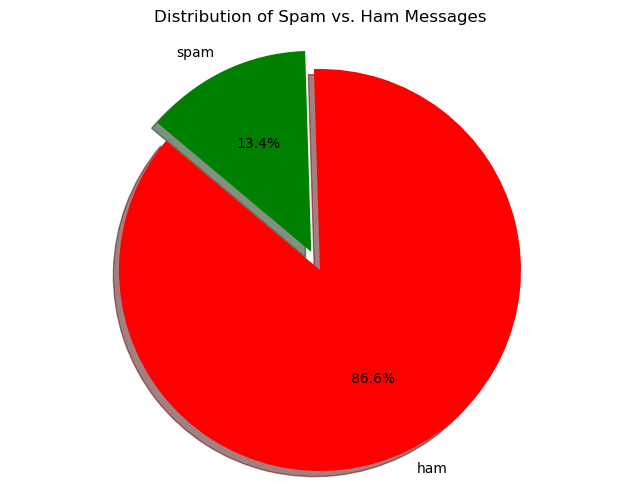

In [3]:
# Category Distribution using a Pie Chart

import matplotlib.pyplot as plt
import seaborn as sns

labels = label_distribution.index
sizes = label_distribution.values
colors = ['red', 'green']
explode = (0.1, 0)  # explode 1st slice for emphasis

plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Distribution of Spam vs. Ham Messages")
plt.show()

In [4]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import string

# Download stopwords (will be used to remove common words)
nltk.download('stopwords')
nltk.download('punkt')

# Initialize the stemmer
ps = PorterStemmer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\asemo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\asemo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [5]:
# Predefined list of common English stopwords
stopwords_list = [
    'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd",
    'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers',
    'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which',
    'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been',
    'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if',
    'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between',
    'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out',
    'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why',
    'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not',
    'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should',
    "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn',
    "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma',
    'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn',
    "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"
]

# Define a function for text preprocessing using the manual approach
def manual_preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Tokenize the text (split by spaces)
    tokens = text.split()
    
    # Remove stopwords and stem the words
    tokens = [ps.stem(word) for word in tokens if word not in stopwords_list]
    
    return ' '.join(tokens)

# Apply the preprocessing function to the email content
spam_data['processed_content'] = spam_data['email_content'].apply(manual_preprocess_text)

# Display the first few rows of the processed content
spam_data[['email_content', 'processed_content']].head()


,email_content,processed_content
0,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...
1,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,Free entry in 2 a wkly comp to win FA Cup fina...,free entri 2 wkli comp win fa cup final tkt 21...
3,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say
4,"Nah I don't think he goes to usf, he lives aro...",nah dont think goe usf live around though


In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Limiting to 5000 most frequent words

# Fit and transform the processed content to generate features
tfidf_features = tfidf_vectorizer.fit_transform(spam_data['processed_content'])

# Check the shape of the generated feature matrix
tfidf_features.shape

(5572, 5000)

In [7]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(tfidf_features, spam_data['label'], test_size=0.25, random_state=42)

X_train.shape, X_test.shape

((4179, 5000), (1393, 5000))

In [8]:
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Initialize and train the MLPClassifier
mlp_clf = MLPClassifier(max_iter=1000, random_state=42)
mlp_clf.fit(X_train, y_train)

# Predict on the test set
mlp_predictions = mlp_clf.predict(X_test)

# Calculate the accuracy for MLPClassifier
mlp_accuracy = accuracy_score(y_test, mlp_predictions)

# Initialize and train the MultinomialNB
nb_clf = MultinomialNB()
nb_clf.fit(X_train, y_train)

# Predict on the test set
nb_predictions = nb_clf.predict(X_test)

# Calculate the accuracy for MultinomialNB
nb_accuracy = accuracy_score(y_test, nb_predictions)

mlp_accuracy, nb_accuracy

(0.9777458722182341, 0.9698492462311558)

In [9]:
# Generate classification reports for both models
mlp_report = classification_report(y_test, mlp_predictions, target_names=['ham', 'spam'])
nb_report = classification_report(y_test, nb_predictions, target_names=['ham', 'spam'])

print(mlp_report, nb_report)


              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1202
        spam       0.98      0.85      0.91       191

    accuracy                           0.98      1393
   macro avg       0.98      0.93      0.95      1393
weighted avg       0.98      0.98      0.98      1393
               precision    recall  f1-score   support

         ham       0.97      1.00      0.98      1202
        spam       1.00      0.78      0.88       191

    accuracy                           0.97      1393
   macro avg       0.98      0.89      0.93      1393
weighted avg       0.97      0.97      0.97      1393



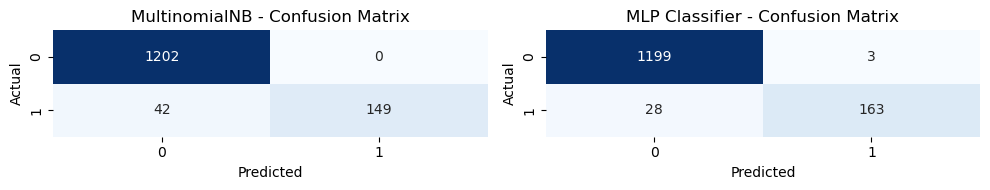

In [12]:
#Confusion Matrix Subplot for 3 Models
from sklearn.metrics import confusion_matrix
models = [("MultinomialNB", nb_clf), ("MLP Classifier", mlp_clf) ]

fig, axes = plt.subplots(1, 2, figsize=(10, 2))
for i, (model_name, model) in enumerate(models):
    prediction = model.predict(X_test)
    cm = confusion_matrix(y_test, prediction)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, ax=axes[i])
    axes[i].set_title(f"{model_name} - Confusion Matrix")
    axes[i].set_xlabel("Predicted")
    axes[i].set_ylabel("Actual")
plt.tight_layout()
plt.show()